Import Libraries


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from keras.models import Sequential
import datetime, math
from datetime import date, timedelta
from keras.utils import plot_model
from sklearn.metrics import mean_squared_error
from tensorflow.keras.utils import set_random_seed
from tensorflow.keras import losses, optimizers
from sklearn.impute import SimpleImputer

In [3]:
#Loading Data
ticker = "BARC.L"
data = yf.download(ticker, start="2004-01-01", end="2024-06-30")

[*********************100%%**********************]  1 of 1 completed


In [4]:
#Data Cleaning
data.reset_index(inplace=True)
data.dropna(inplace=True)

#Handling missing values in a more robust way
imputer = SimpleImputer(strategy='mean')
data['Close'] = imputer.fit_transform(data[['Close']])

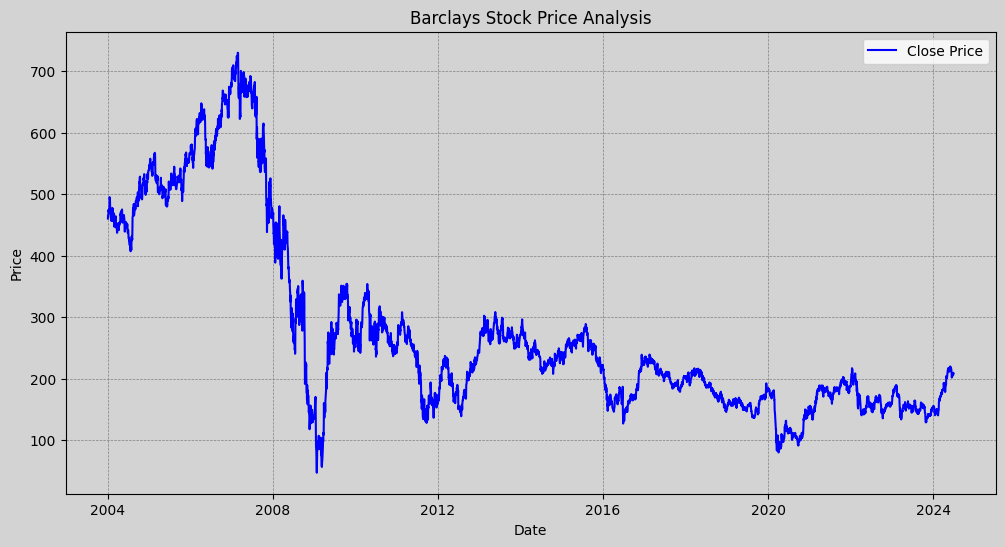

In [5]:
plt.figure(figsize=(12, 6))  # Set the figure size

# Plotting the closing price
plt.plot(data["Date"], data["Close"], label='Close Price', color='blue')
plt.title("Barclays Stock Price Analysis")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.gca().set_facecolor('lightgray')  # Plot background
plt.gcf().set_facecolor('lightgray')  # Figure background
plt.legend()
plt.show()

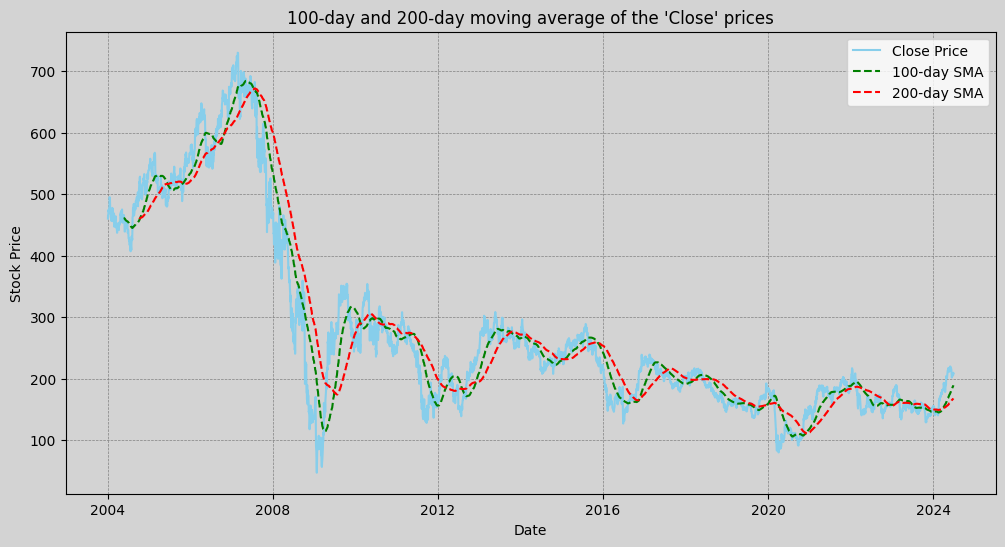

In [6]:
#Calculating and plotting the 100-day and 200-day moving average of the 'Close' prices
data['SMA_100'] = data['Close'].rolling(window=100).mean()  # 100-day Simple Moving Average
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average

plt.figure(figsize=(12,6))
plt.plot(data["Date"], data["Close"], label='Close Price',  color='skyblue')
plt.plot(data["Date"], data['SMA_100'], label='100-day SMA',linestyle='--', color='g')
plt.plot(data["Date"], data['SMA_200'], label='200-day SMA',linestyle='--', color='r')
plt.title("100-day and 200-day moving average of the 'Close' prices")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.gca().set_facecolor('lightgray')
plt.gcf().set_facecolor('lightgray')
plt.legend()
plt.show()

In [7]:
# Splitting Data
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])


#Scaling Data
scaler = MinMaxScaler(feature_range=(0,1))
data_train_scale = scaler.fit_transform(data_train)
data_test_scale = scaler.transform(data_test)

# Creating Training Sequences
def create_sequences(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [8]:
time_step = 100
X_train, y_train = create_sequences(data_train_scale, time_step)
X_test, y_test = create_sequences(data_test_scale, time_step)

# Reshape input to be samples, time steps, features which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [9]:
# #from keras.models import load_model
# import tensorflow as tf

# # Load the saved LSTM model
# lstm_model = tf.keras.models.load_model("/content/sample_data/Test_1.keras")

In [10]:
# Building the LSTM Model
lstm_model = Sequential()
lstm_model.add(Bidirectional(LSTM(50, return_sequences=True, input_shape=(time_step, 1))))
lstm_model.add(Dropout(0.2))
lstm_model.add(Bidirectional(LSTM(50, return_sequences=True)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Bidirectional(LSTM(50)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the model to the training data with validation data
history = lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 49s 292ms/step - loss: 0.0202 - val_loss: 3.5555e-04
Epoch 2/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 296ms/step - loss: 0.0020 - val_loss: 1.5201e-04
Epoch 3/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 294ms/step - loss: 0.0020 - val_loss: 1.3751e-04
Epoch 4/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 290ms/step - loss: 0.0018 - val_loss: 2.1946e-04
Epoch 5/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 46s 331ms/step - loss: 0.0015 - val_loss: 1.0157e-04
Epoch 6/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 76s 282ms/step - loss: 0.0014 - val_loss: 1.4242e-04
Epoch 7/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 43s 298ms/step - loss: 0.0014 - val_loss: 8.1046e-05
Epoch 8/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 290ms/step - loss: 0.0012 - val_loss: 1.2055e-04
Epoch 9/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 47s 342ms/step - loss: 0.0011 - val_loss: 7.0133e-05
Epoch 10/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 74s 284ms/step - loss: 0.0011 - val_loss: 7.1066e-05
Epoch 11/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 290ms/step - 

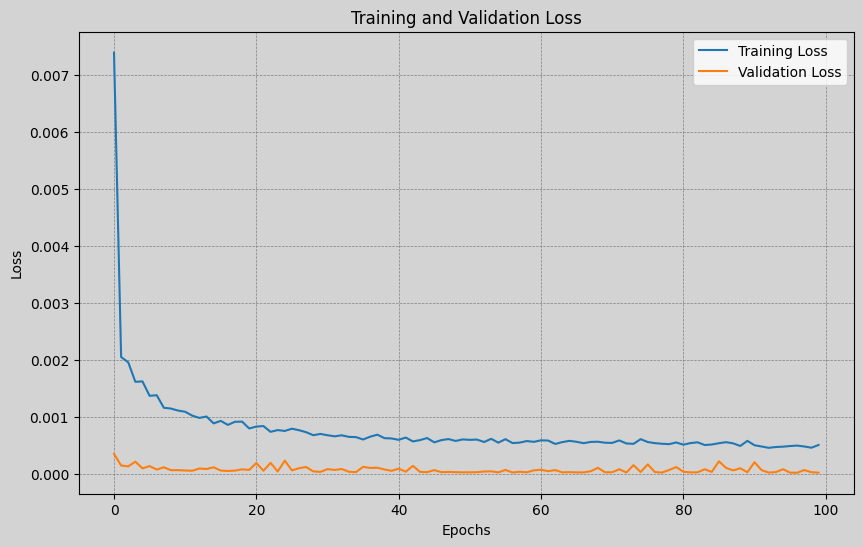

In [11]:
# Plot training loss and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.gca().set_facecolor('lightgray')
plt.gcf().set_facecolor('lightgray')
plt.show()

In [12]:
lstm_model.save("/content/drive/MyDrive/Test_File.keras")

In [13]:
#Summarizing the Model architecture
lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 100, 100)            │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 100, 100)            │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 100)                 │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 425,105 (1.62 MB)

 Trainable params: 141,701 (553.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 283,404 (1.08 MB)

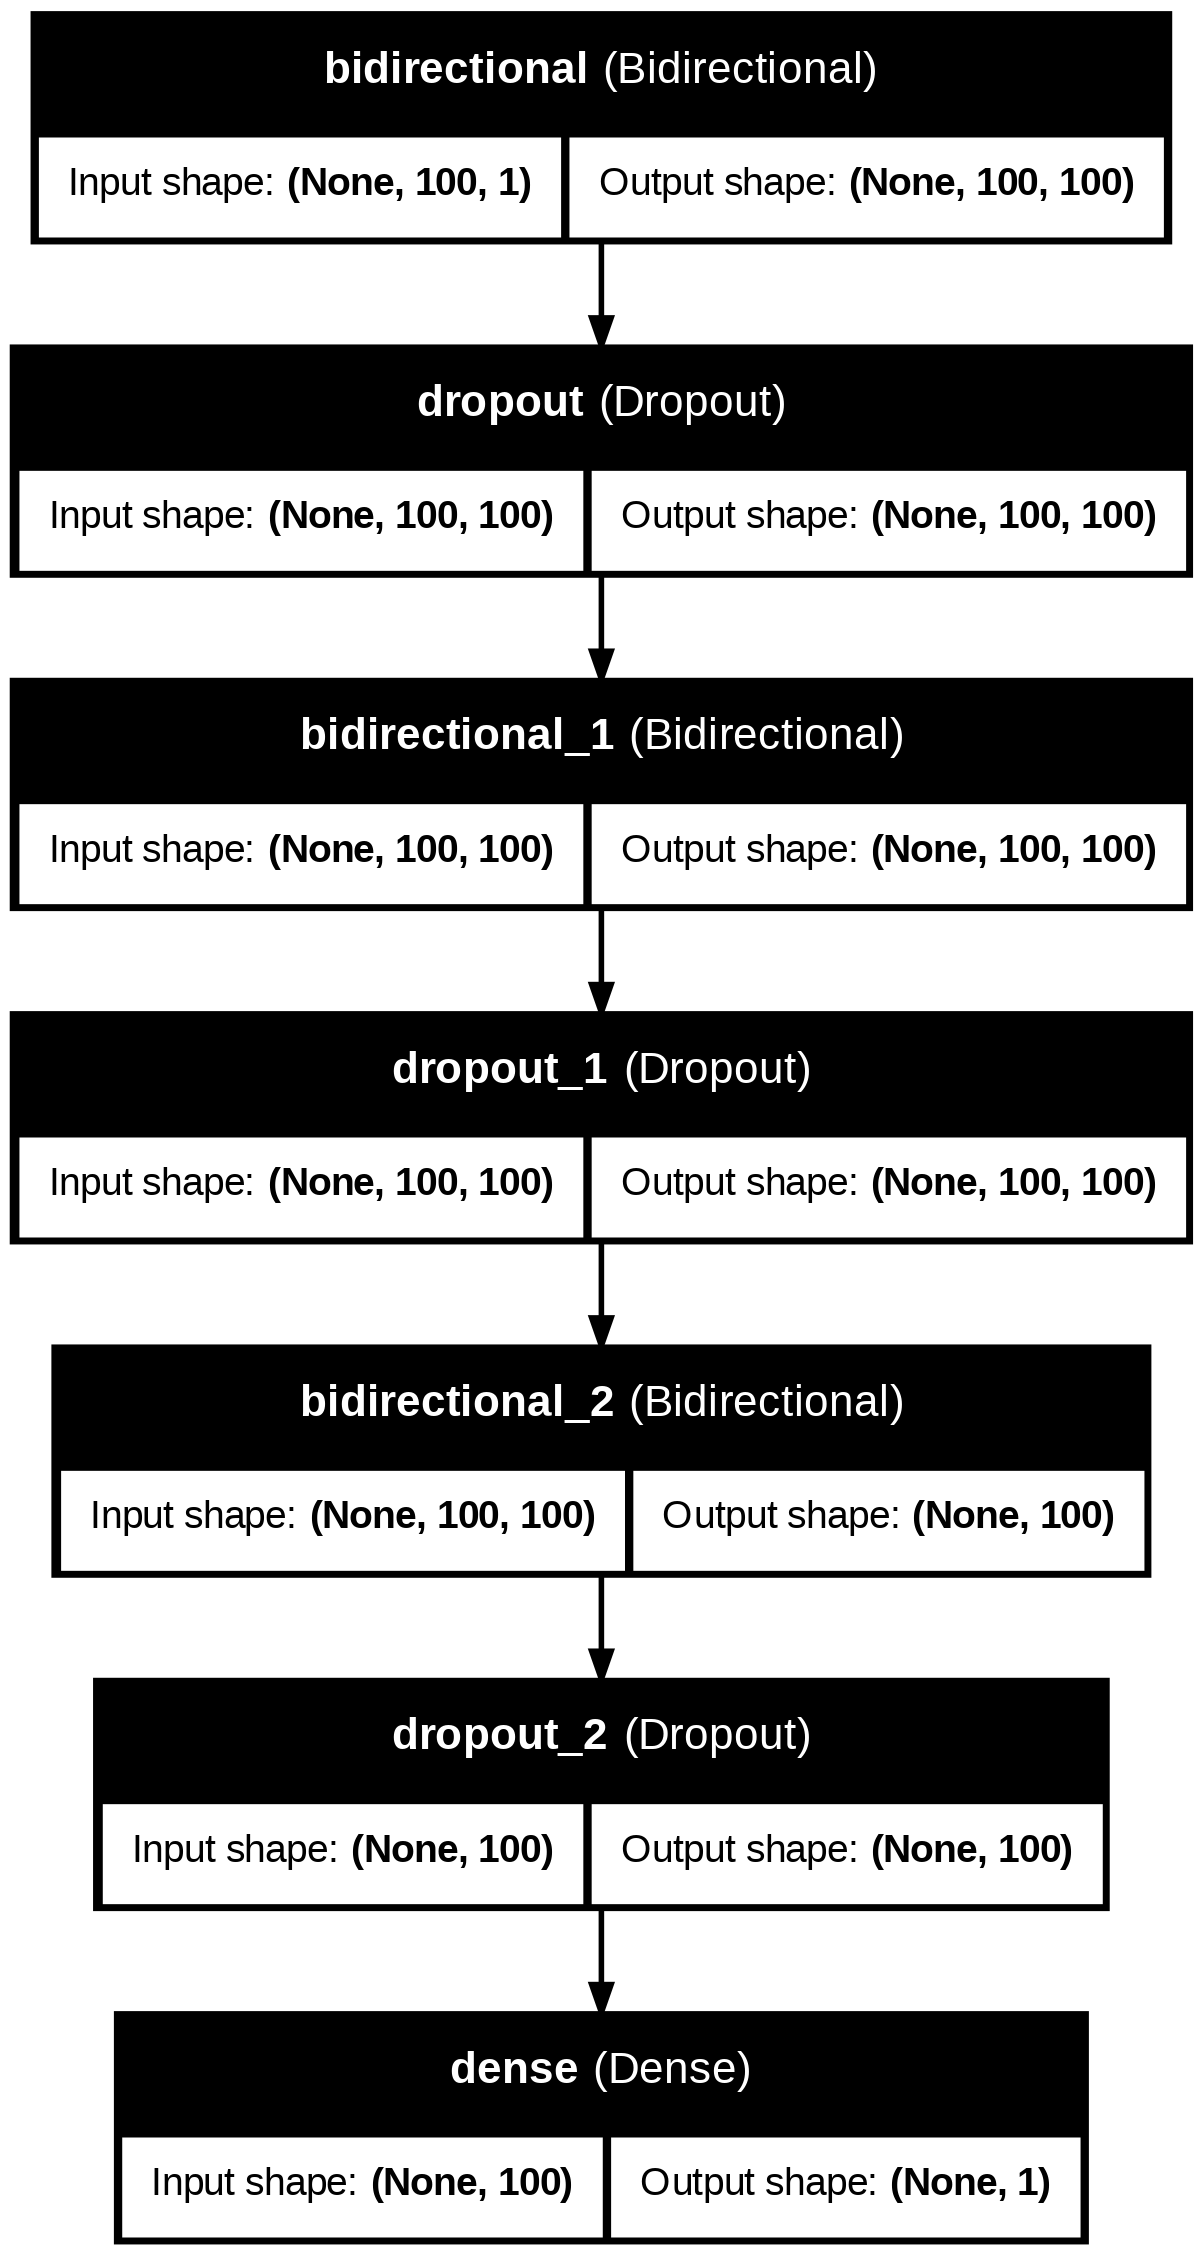

In [14]:
from keras.utils import plot_model
plot_model(lstm_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

127/127 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step
RMSE on Training Data: 7.920710873952584
RMSE on Test Data: 3.4837415544138906


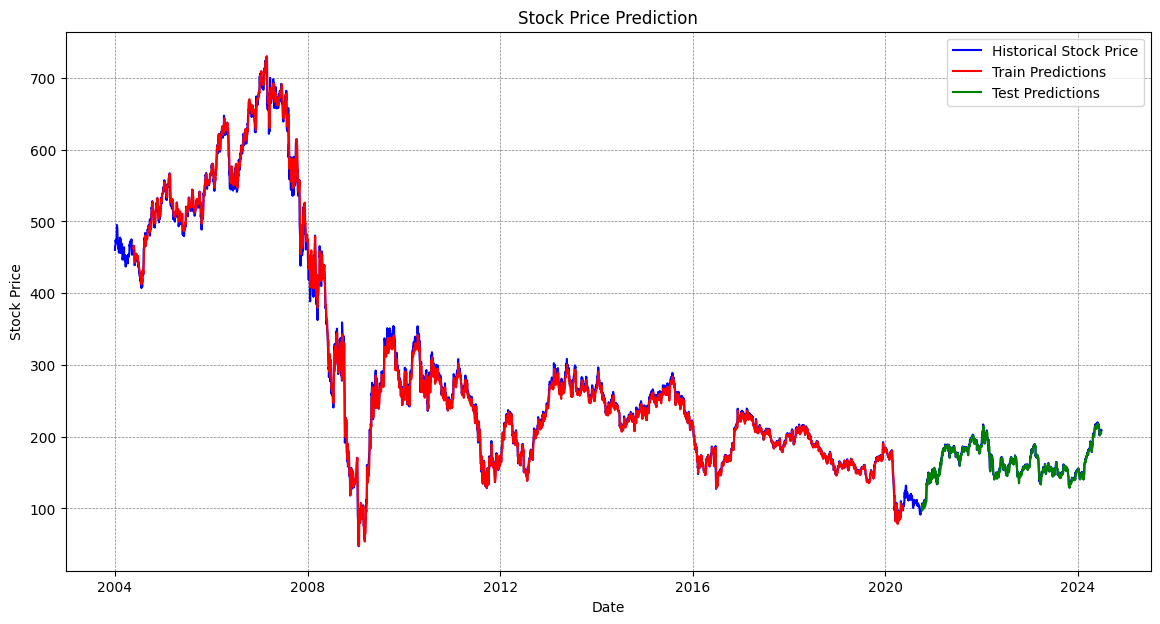

In [15]:
# Predicting on the Test Data
train_predict = lstm_model.predict(X_train)
test_predict = lstm_model.predict(X_test)

# Inverse Transforming the Predictions and Actual Values to Original Scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, train_predict))
rmse_test = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'RMSE on Training Data: {rmse_train}')
print(f'RMSE on Test Data: {rmse_test}')

# Plotting the Predictions and Actual Values
plt.figure(figsize=(14,7))
plt.plot(data['Date'], data['Close'], label='Historical Stock Price', color='blue')
plt.plot(data['Date'][time_step:len(train_predict)+time_step], train_predict, label='Train Predictions', color='red')
plt.plot(data['Date'][len(train_predict)+(time_step*2)+1:len(data)-1], test_predict, label='Test Predictions', color='green')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━

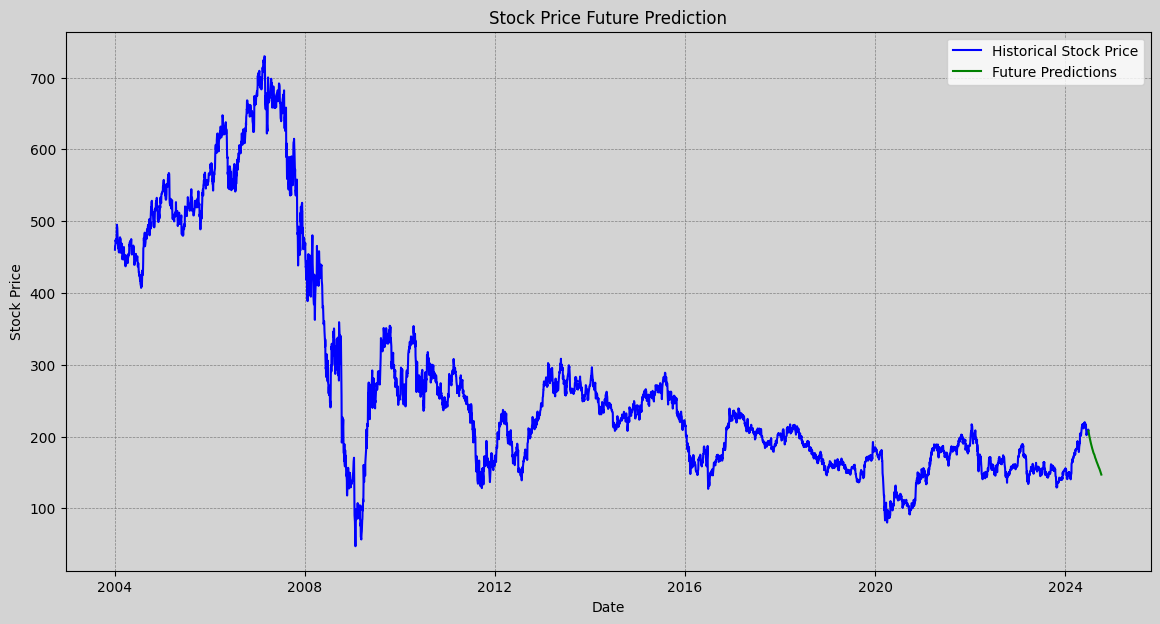

In [21]:
# Future Prediction Code
# Ensure correct scaling and transformation of the last 100 days
last_100_days = data['Close'].values[-100:].reshape(-1, 1)
last_100_days_scaled = scaler.transform(last_100_days)

# Ensure correct shape of the input data
current_input = last_100_days_scaled.reshape(1, last_100_days_scaled.shape[0], last_100_days_scaled.shape[1])

# Number of future days to predict
future_days = 100

# Generating future predictions
future_predictions = []

for _ in range(future_days):
    future_pred = lstm_model.predict(current_input)
    future_predictions.append(future_pred[0, 0])
    current_input = np.append(current_input[:, 1:, :], future_pred.reshape(1, 1, 1), axis=1)

# Inverse transform the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Generate future dates
last_date = data['Date'].iloc[-1]
future_dates = pd.date_range(last_date + timedelta(1), periods=future_days).tolist()

# Plotting the future predictions
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], color='blue', label='Historical Stock Price')
plt.plot(future_dates, future_predictions, color='green', label='Future Predictions')
plt.title('Stock Price Future Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.gca().set_facecolor('lightgray')
plt.gcf().set_facecolor('lightgray')
plt.show()

DEBUG:cmdstanpy:input tempfile: /tmp/tmpaaqt9fc0/g94w9938.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaaqt9fc0/uebl4qsb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73372', 'data', 'file=/tmp/tmpaaqt9fc0/g94w9938.json', 'init=/tmp/tmpaaqt9fc0/uebl4qsb.json', 'output', 'file=/tmp/tmpaaqt9fc0/prophet_modelw9zmnqcz/prophet_model-20240803002414.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:24:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


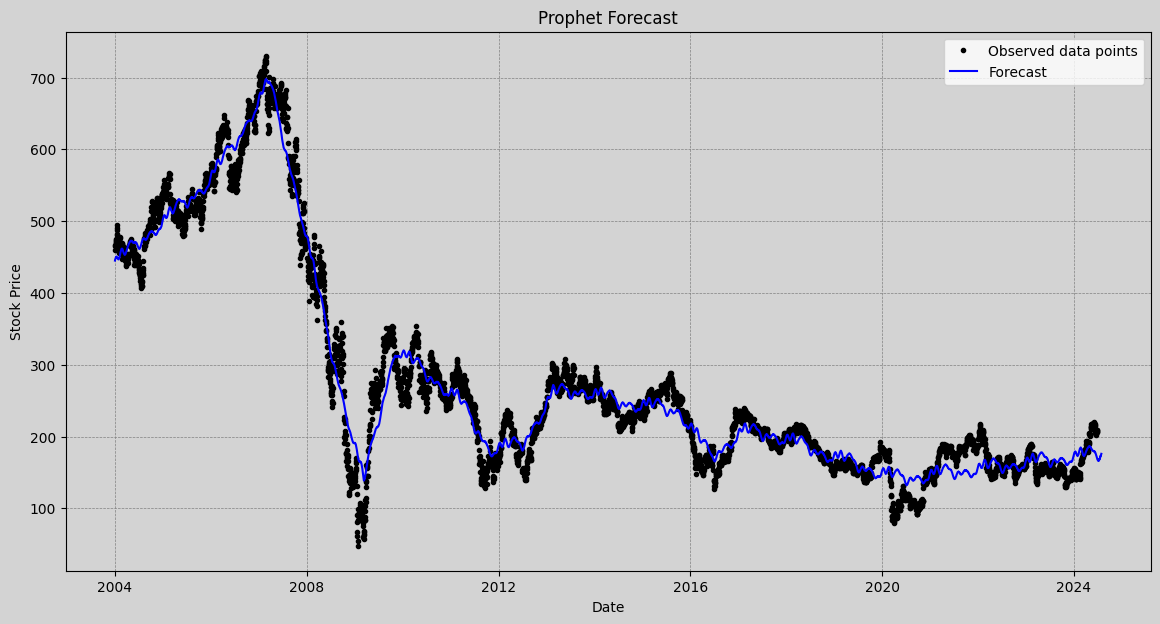

In [24]:
import matplotlib.pyplot as plt
from prophet import Prophet

# Prepare the data for Prophet
prophet_data = data[['Date', 'Close']]
prophet_data.columns = ['ds', 'y']

# Initialize and fit the Prophet model
prophet_model = Prophet(daily_seasonality=True)
prophet_model.fit(prophet_data)

# Make future predictions
future = prophet_model.make_future_dataframe(periods=future_days)
forecast = prophet_model.predict(future)

# Plot the forecast without the uncertainty interval using Matplotlib
plt.figure(figsize=(14, 7))
plt.plot(prophet_data['ds'], prophet_data['y'], 'k.', label='Observed data points')
plt.plot(forecast['ds'], forecast['yhat'], 'b-', label='Forecast')
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.gca().set_facecolor('lightgray')
plt.gcf().set_facecolor('lightgray')
plt.show()


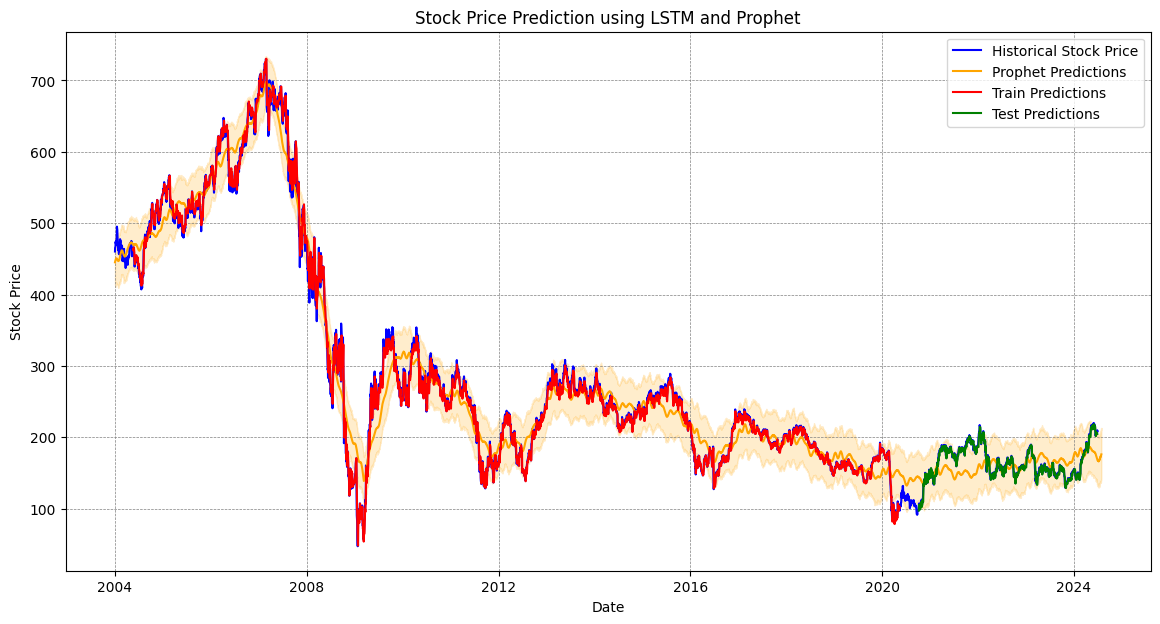

In [25]:
# Combine LSTM and Prophet predictions
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], color='blue', label='Historical Stock Price')
plt.plot(forecast['ds'], forecast['yhat'], color='orange', label='Prophet Predictions')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2)
plt.plot(data['Date'][time_step:len(train_predict)+time_step], train_predict, color='red', label='Train Predictions')
plt.plot(data['Date'][len(train_predict)+(time_step*2)+1:len(data)-1], test_predict, color='green', label='Test Predictions')
plt.title('Stock Price Prediction using LSTM and Prophet')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.show()



In [26]:
# Print the prediction and the actual close value for comparison
comparison_df = pd.DataFrame({
    'Date': data['Date'][len(data_train):len(data_train) + len(y_test)],
    'Actual': y_test.flatten(),
    'Predicted': test_predict.flatten()
})

comparison_df

,Date,Actual,Predicted
4153,2020-05-15,104.180000,97.177261
4154,2020-05-18,104.500000,101.976768
4155,2020-05-19,107.099998,103.187019
4156,2020-05-20,107.279999,105.423859
4157,2020-05-21,105.839996,105.757072
...,...,...,...
5086,2024-01-29,204.850006,206.911209
5087,2024-01-30,207.550003,204.145706
5088,2024-01-31,206.149994,205.803101
5089,2024-02-01,205.850006,204.971436
